In [ ]:
# Import the necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow
import itertools
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, Dense, Activation
from keras.models import Model, load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **Loading the dataset**

In [ ]:
BATCH_SIZE = 40
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
IMAGE_CHANNELS = 3

In [ ]:
# Make use of ImageDataGenerator to read the data
# Build the Data Generators
dset_path = '/content/drive/MyDrive/CNN Practice Datasets/PRCP - 1001 - Rice Leaf Dataset'
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, rescale=1./255, validation_split = 0.2)
train_generator = datagen.flow_from_directory(dset_path,target_size=(128,128),batch_size=BATCH_SIZE,
                                              interpolation="lanczos",class_mode='sparse',shuffle=True,subset='training')
validation_generator = datagen.flow_from_directory(dset_path,target_size=(128,128),batch_size=BATCH_SIZE,
                                                   interpolation="lanczos",class_mode='sparse',shuffle=True,subset='validation')

Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


In [ ]:
print('Number of training samples: ',train_generator.samples)
print('Number of validation samples: ',validation_generator.samples)
print('Number of training classes: ',len(train_generator.class_indices))
print('Number of validation classes: ',len(validation_generator.class_indices))
print('Number of training samples per class:', int(train_generator.samples/len(train_generator.class_indices)))
print('Number of validation samples per class:', int(validation_generator.samples/len(validation_generator.class_indices)))

Number of training samples:  96
Number of validation samples:  23
Number of training classes:  3
Number of validation classes:  3
Number of training samples per class: 32
Number of validation samples per class: 7


In [ ]:
train_generator.filenames[0:5]

['Bacterial leaf blight/DSC_0376.JPG',
 'Bacterial leaf blight/DSC_0377.JPG',
 'Bacterial leaf blight/DSC_0378.JPG',
 'Bacterial leaf blight/DSC_0379.JPG',
 'Bacterial leaf blight/DSC_0380.JPG']

In [ ]:
print("Training class indices:",train_generator.class_indices)
print("Validation class indices:",validation_generator.class_indices)

Training class indices: {'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}
Validation class indices: {'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}


In [ ]:
X_train,y_train = next(train_generator)
print('X_train: ',type(X_train))
print('y_train: ',type(y_train))
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)

X_train:  <class 'numpy.ndarray'>
y_train:  <class 'numpy.ndarray'>
X_train:  (40, 128, 128, 3)
y_train:  (40,)


In [ ]:
X_val,y_val = next(validation_generator)
print('X_val: ',type(X_val))
print('y_val: ',type(y_val))
print('X_val: ',X_val.shape)
print('y_val: ',y_val.shape)

X_val:  <class 'numpy.ndarray'>
y_val:  <class 'numpy.ndarray'>
X_val:  (23, 128, 128, 3)
y_val:  (23,)


In [ ]:
X_train

array([[[[0.93640375, 0.90261036, 0.89104736],
         [0.93653774, 0.9006632 , 0.888467  ],
         [0.93725497, 0.90291595, 0.8862746 ],
         ...,
         [0.9228948 , 0.8705883 , 0.85098046],
         [0.92345935, 0.8705883 , 0.85098046],
         [0.9240239 , 0.8705883 , 0.85098046]],

        [[0.9359703 , 0.9058824 , 0.8921441 ],
         [0.93618566, 0.9040006 , 0.8893837 ],
         [0.93725497, 0.90266085, 0.8862746 ],
         ...,
         [0.924205  , 0.8705883 , 0.84969515],
         [0.92364043, 0.8705883 , 0.8491306 ],
         [0.92307585, 0.8705883 , 0.848566  ]],

        [[0.9368185 , 0.9058824 , 0.8923232 ],
         [0.93604296, 0.90456516, 0.88766694],
         [0.93725497, 0.90196085, 0.8870523 ],
         ...,
         [0.92281306, 0.87183267, 0.8495477 ],
         [0.92337763, 0.87239724, 0.85067683],
         [0.9239422 , 0.8729618 , 0.851806  ]],

        ...,

        [[0.94117653, 0.91372555, 0.8980393 ],
         [0.94117653, 0.91372555, 0.8980393 ]

In [ ]:
y_train

array([0., 0., 0., 0., 1., 2., 2., 2., 0., 2., 2., 1., 0., 1., 0., 0., 2.,
       0., 1., 1., 1., 1., 0., 1., 2., 2., 2., 1., 0., 0., 0., 2., 2., 0.,
       1., 0., 1., 1., 1., 2.], dtype=float32)

In [ ]:
y_val

array([2., 0., 0., 1., 2., 2., 1., 2., 1., 0., 1., 1., 1., 0., 2., 1., 0.,
       1., 2., 0., 2., 0., 0.], dtype=float32)

In [ ]:
X_val

array([[[[0.9450981 , 0.9179041 , 0.9058824 ],
         [0.9450981 , 0.91402733, 0.9022626 ],
         [0.9450981 , 0.9173006 , 0.9055359 ],
         ...,
         [0.9395374 , 0.89640015, 0.8705883 ],
         [0.9401283 , 0.8969911 , 0.8705883 ],
         [0.94071925, 0.897582  , 0.8705883 ]],

        [[0.9450981 , 0.918495  , 0.9058824 ],
         [0.9450981 , 0.9146182 , 0.9028535 ],
         [0.9450981 , 0.91670966, 0.90494496],
         ...,
         [0.94117653, 0.8980393 , 0.8728259 ],
         [0.94117653, 0.8980393 , 0.8734169 ],
         [0.94117653, 0.8980393 , 0.8740078 ]],

        [[0.9450981 , 0.9190859 , 0.9058824 ],
         [0.9450981 , 0.9152091 , 0.9034444 ],
         [0.9450981 , 0.91611874, 0.90435404],
         ...,
         [0.94117653, 0.8980393 , 0.8745099 ],
         [0.94117653, 0.8980393 , 0.8745099 ],
         [0.94117653, 0.8980393 , 0.8745099 ]],

        ...,

        [[0.94776917, 0.91372555, 0.90196085],
         [0.9471782 , 0.91372555, 0.90196085]

# **Data Pre-processing**

In [ ]:
from keras.utils.np_utils import to_categorical
# One-hot encode integers to binary matrix
y_train = to_categorical(y_train.astype(int))
y_val = to_categorical(y_val.astype(int))
print(y_val.shape)
print(y_train.shape)
print(X_train.shape)
print(X_val.shape)

(23, 3)
(40, 3)
(40, 128, 128, 3)
(23, 128, 128, 3)


In [ ]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
y_val

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

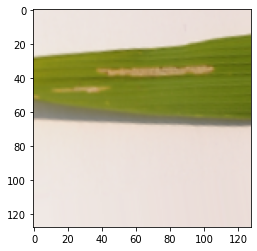

In [ ]:
image = X_train[0,:,:,:]
plt.imshow(image)
plt.show()

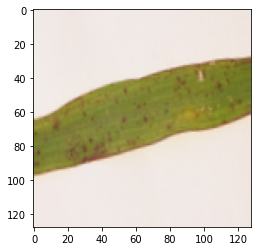

In [ ]:
image = X_val[0,:,:,:]
plt.imshow(image)
plt.show()

# **Training the model using Convolution Neural Network (CNN)**

In [ ]:
from keras.models import Sequential
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(128,128,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
history = model.fit_generator(train_generator, validation_data = validation_generator,
                           epochs= 50, verbose = 1, validation_steps = 16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
3/3 [==============================] - 7s 2s/step - loss: 1.0751 - accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 8s 2s/step - loss: 1.0775 - accuracy: 0.4896
Epoch 3/50
3/3 [==============================] - 7s 2s/step - loss: 1.0547 - accuracy: 0.4583
Epoch 4/50
3/3 [==============================] - 8s 2s/step - loss: 1.0161 - accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 7s 2s/step - loss: 1.0233 - accuracy: 0.4479
Epoch 6/50
3/3 [==============================] - 7s 3s/step - loss: 0.9737 - accuracy: 0.4375
Epoch 7/50
3/3 [==============================] - 7s 2s/step - loss: 0.9606 - accuracy: 0.4375
Epoch 8/50
3/3 [==============================] - 7s 2s/step - loss: 0.9226 - accuracy: 0.5208
Epoch 9/50
3/3 [==============================] - 7s 2s/step - loss: 0.8700 - accuracy: 0.5312
Epoch 10/50
3/3 [==============================] - 7s 2s/step - loss: 0.8628 - accuracy: 0.5938
Epoch 11/50
3/3 [==============================] 

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
y_pred

array([2, 0, 0, 2, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 2, 0, 2, 0,
       0])

In [ ]:
y_true = np.asarray(y_val) 
y_true = np.argmax(y_val, axis=1)

In [ ]:
y_true

array([2, 0, 0, 1, 2, 2, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2, 0, 2, 0,
       0])

## **Evaluation Metrics**

In [ ]:
cm = confusion_matrix(y_true, y_pred)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[8 0 0]
 [1 4 3]
 [0 1 6]]


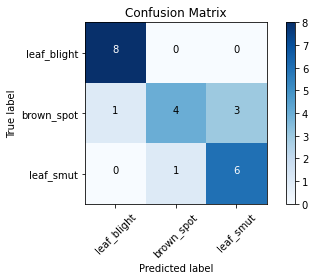

In [ ]:
# bacterial_leaf_blight = 0
# brown_spot = 1
# leaf_smut = 2

cm_plot_labels = ['leaf_blight', 'brown_spot', 'leaf_smut']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [ ]:
# Generate a classification report
print("Accuracy Score=",accuracy_score(y_true,y_pred))
report = classification_report(y_true, y_pred, target_names=['bacterial_leaf_blight', 'brown_spot', 'leaf_smut'])
print(report)

Accuracy Score= 0.782608695652174
                       precision    recall  f1-score   support

bacterial_leaf_blight       0.89      1.00      0.94         8
           brown_spot       0.80      0.50      0.62         8
            leaf_smut       0.67      0.86      0.75         7

             accuracy                           0.78        23
            macro avg       0.79      0.79      0.77        23
         weighted avg       0.79      0.78      0.77        23



In [ ]:
pd.crosstab(y_true,y_pred)

col_0,0,1,2
row_0,,,
0,8,0,0
1,1,4,3
2,0,1,6


In [ ]:
confusion_matrix(y_true,y_pred)

array([[8, 0, 0],
       [1, 4, 3],
       [0, 1, 6]])

## **Visualization**

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


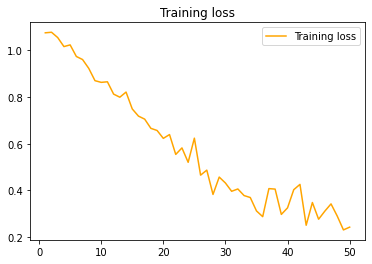

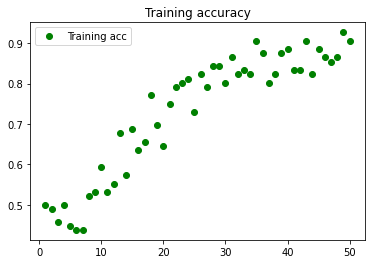

<Figure size 432x288 with 0 Axes>

In [ ]:
# display the loss and accuracy curves for history

import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, color ='orange', label='Training loss')

plt.title('Training loss')
plt.legend()
plt.figure()


plt.plot(epochs, acc, 'bo', label='Training acc', color = 'green')

plt.title('Training accuracy')
plt.legend()
plt.figure()

plt.show()

<Figure size 720x1080 with 0 Axes>

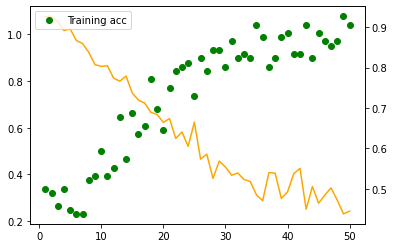

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(10,15))
fig , ax1 = plt.subplots()
ax1.plot(epochs, loss, color ='orange', label='Training loss')
ax2 = ax1.twinx() # share x axes of ax1
ax2.plot(epochs, acc, 'bo', label='Training acc', color = 'green')
plt.legend()
plt.figure()
plt.show()